# Logistic Regression
This project consist of a CSV file named as "personality_dataset.csv"                    
This dataset is about predicting a person’s personality type (Introvert, Ambivert, or Extrovert) based on different psychological, social, and behavioral traits.

### Import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Let's take a peek at our data         
### We'll use `pandas` to read the CSV file and show the first 5 rows. 

In [2]:
df=pd.read_csv("personality_synthetic_dataset.csv")
df.head()

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084


In [3]:
df.shape

(20000, 30)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  object 
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public_speaking_comfort   20000 non-null  float64
 14  curios

In [5]:
df.describe()

,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,organization,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5.509190,5.454690,5.525955,5.958689,6.014381,5.040063,6.964450,6.483220,5.996018,5.973280,...,5.495280,5.033716,5.940795,5.492490,6.498574,5.508935,6.006893,6.501986,5.516168,5.981982
std,2.468526,2.493731,2.488006,2.162427,2.178551,2.810563,1.647944,1.534911,1.496690,1.697589,...,1.922809,2.203344,2.170924,1.931728,1.889493,1.932081,1.683523,1.889782,1.944257,1.490327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.308044,0.804853,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.590989,3.509578,3.595866,4.382619,4.415537,2.727584,5.812701,5.448486,4.992667,4.805742,...,4.156240,3.429189,4.325104,4.127064,5.157772,4.155375,4.867919,5.160594,4.149764,4.973047
50%,5.540706,5.464038,5.574786,5.972345,6.051489,5.053005,6.989855,6.481365,6.003320,5.986871,...,5.499699,5.045021,5.962857,5.508153,6.528960,5.498701,6.006740,6.525735,5.528102,5.978661
75%,7.424123,7.416314,7.472371,7.598495,7.668598,7.363676,8.155574,7.521483,7.013412,7.142282,...,6.853083,6.656162,7.564929,6.861487,7.885414,6.877156,7.160525,7.878841,6.905844,6.991311
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Sometimes our dataset has empty spots, called missing values. We can use `df.isnull().sum()` to count how many missing values are in each column.


In [6]:
df.isnull().sum()

personality_type            0
social_energy               0
alone_time_preference       0
talkativeness               0
deep_reflection             0
group_comfort               0
party_liking                0
listening_skill             0
empathy                     0
creativity                  0
organization                0
leadership                  0
risk_taking                 0
public_speaking_comfort     0
curiosity                   0
routine_preference          0
excitement_seeking          0
friendliness                0
emotional_stability         0
planning                    0
spontaneity                 0
adventurousness             0
reading_habit               0
sports_interest             0
online_social_usage         0
travel_desire               0
gadget_usage                0
work_style_collaborative    0
decision_speed              0
stress_handling             0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

### Let's see all the columns in our dataset and what kind of data each column has (numbers, words, yes/no, etc.). This helps us understand our data better.


In [8]:
df.columns

Index(['personality_type', 'social_energy', 'alone_time_preference',
       'talkativeness', 'deep_reflection', 'group_comfort', 'party_liking',
       'listening_skill', 'empathy', 'creativity', 'organization',
       'leadership', 'risk_taking', 'public_speaking_comfort', 'curiosity',
       'routine_preference', 'excitement_seeking', 'friendliness',
       'emotional_stability', 'planning', 'spontaneity', 'adventurousness',
       'reading_habit', 'sports_interest', 'online_social_usage',
       'travel_desire', 'gadget_usage', 'work_style_collaborative',
       'decision_speed', 'stress_handling'],
      dtype='object')

### Let's **count how many people belong to each personality type**.  

<Axes: xlabel='personality_type', ylabel='count'>

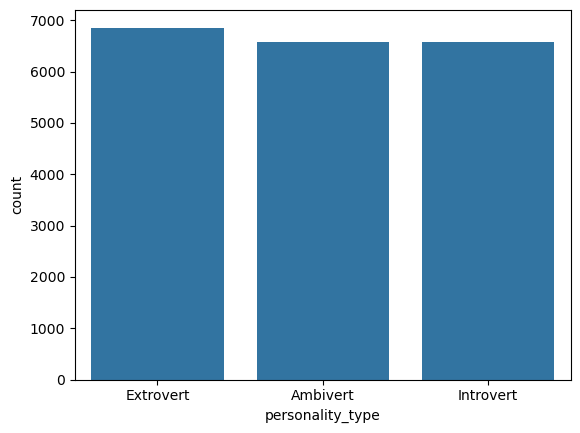

In [9]:
sns.countplot(x='personality_type',data=df)

### We want to check **how many people have low, medium, or high social energy**.  
A histogram shows the **count of people** for different ranges of social energy. The line (KDE) shows the smooth trend.

<Axes: xlabel='social_energy', ylabel='Count'>

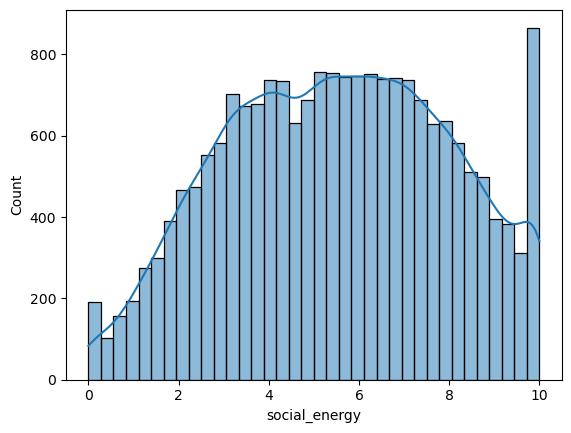

In [10]:
sns.histplot(df['social_energy'],kde=True)

### Let's use a pair plot and see how one column is related to another column                                                              This will help us to know that which columns are more related to each other.

In [11]:
# sns.pairplot(df[['talkativeness','empathy','creativity','personality_type']],hue='personality_type')

In [12]:
from scipy.stats import f_oneway

In [13]:
annove_result={}
for col in df.columns:   
    if col == 'personality_type':
        continue

    groups=[group[col].values for name,group in df.groupby('personality_type')]

    f_stats,p_value=f_oneway(*groups)
    annove_result[col]={"f_statistics":f_stats,"P_Value":p_value}

    annove_df=pd.DataFrame(annove_result).T
    

In [14]:
annove_df
    

,f_statistics,P_Value
social_energy,18674.734968,0.000000e+00
alone_time_preference,19614.798420,0.000000e+00
talkativeness,19446.844628,0.000000e+00
deep_reflection,11801.516164,0.000000e+00
group_comfort,12418.715253,0.000000e+00
party_liking,28878.230314,0.000000e+00
listening_skill,3009.268982,0.000000e+00
empathy,718.923093,3.090190e-302
creativity,0.030560,9.699025e-01
organization,2991.681333,0.000000e+00


In [15]:
annove_df['significant (p<0.05)']=annove_df['P_Value'] < 0.05
annove_df=annove_df.sort_values(by='f_statistics',ascending=False)

In [16]:
annove_df

,f_statistics,P_Value,significant (p<0.05)
party_liking,28878.230314,0.000000e+00,True
alone_time_preference,19614.798420,0.000000e+00,True
public_speaking_comfort,19578.062000,0.000000e+00,True
talkativeness,19446.844628,0.000000e+00,True
excitement_seeking,19160.462944,0.000000e+00,True
social_energy,18674.734968,0.000000e+00,True
reading_habit,12422.815562,0.000000e+00,True
group_comfort,12418.715253,0.000000e+00,True
leadership,12249.376283,0.000000e+00,True
adventurousness,11918.450912,0.000000e+00,True


### Machine learning models cannot understand text, so we have to convert `personality_type` to numbers using `LabelEncoder` from sklearn.preprocessing. This lets the model process and learn from it.


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder=LabelEncoder()

In [19]:
df['personality_type']=encoder.fit_transform(df['personality_type'])

### Split X and y features.

In [20]:
x=df.drop(['personality_type','emotional_stability','stress_handling','creativity'],axis=1)
y=df['personality_type']

### Machine learning models work better when all features are on the same scale, so we use `StandardScaler` from `sklearn.preprocessing` to transform the features. This makes each feature have a **mean of 0** and **standard deviation of 1**, helping the model learn efficiently.


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scalar=StandardScaler()

In [23]:
x_scaled=scalar.fit_transform(x)

### To evaluate a machine learning model properly, we split the dataset into training and testing sets using `train_test_split` from `sklearn.model_selection`. 
This keeps **80% of the data for training** and **20% for testing**, so the model can learn from one part and be evaluated on unseen data.


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=42,test_size=0.2)

### Now we have finally splitted our data as test and train now let's create logistic regression model and we will import it from the

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model_1=LogisticRegression()

### Once we have created our model now it's training time 

In [28]:
model_1.fit(x_train,y_train)

LogisticRegression()

### Awesome! The model is trained, and now we can use `.predict(X_test)` to generate predictions on the test set.


In [29]:
predictions=model_1.predict(x_test)

In [30]:
predictions

array([0, 1, 2, ..., 2, 0, 0])

### Finally, let's evaluate our model’s performance using accuracy. We’ll apply `accuracy_score(y_test, y_pred)` which we will import from `sklearn.metrics`.


In [31]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [32]:
cm=confusion_matrix(y_test,predictions)

In [33]:
cm

array([[1257,    2,    2],
       [   5, 1421,    0],
       [   1,    0, 1312]])

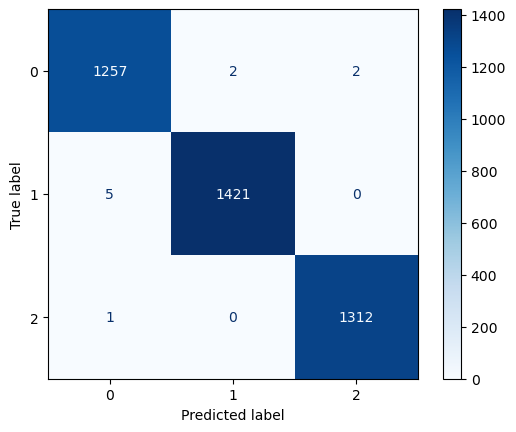

In [34]:
disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')

In [35]:
from sklearn.metrics import accuracy_score,classification_report

In [36]:
accuracy_score(y_test,predictions)

0.9975

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1261
           1       1.00      1.00      1.00      1426
           2       1.00      1.00      1.00      1313

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [38]:
# Checking Overfitting
y_train_pred=model_1.predict(x_train)
y_test_pred=model_1.predict(x_test)



In [39]:
accu_train=accuracy_score(y_train,y_train_pred)
accu_test=accuracy_score(y_test,y_test_pred)

In [40]:
accu_train

0.998125

In [41]:
accu_test

0.9975

In [42]:
import pickle

In [43]:
with open('personality_model.pkl','wb') as file:
    pickle.dump(model_1,file)

In [46]:
with open('scalar.pkl','wb') as f:
    pickle.dump(scalar,f)

with open('encoder.pkl','wb') as f:
    pickle.dump(encoder,f)
